<a href="https://colab.research.google.com/github/TheDon57/MODS_Exercises/blob/main/Week_4_exercise/LM_Week_04_BikeSharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
Nowadays Sharing Economies become ever more present, so that for instance people start preferring to flexibly rent a car whenever they need one instead of owning a car which stands still most of the time. This also transfers to services like bike and e-scooter sharing.
In this weeks tutorial we will use such a [Bikesharing](https://www.kaggle.com/competitions/bike-sharing-demand/) dataset and try to answer questions like:

How strong is the weathers influence on the number of rented bikes?

How do workdays compare to weekends?

How does the time affect bike rentals?

To answer these questions and many more we will go through the steps of creating a simple linear regression.

In [1]:
import numpy as np
import random
# Set seed for reproducibility
np.random.seed(42)  # Set seed for NumPy
random.seed(42) # Set seed for random module

# Load Data
First we need to load the Bikesharing dataset.

*Run the code below.*

In [2]:
import pandas as pd

# Loading the data from a csv file
data = pd.read_csv("https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/BikeSharing.csv")

# Explore Data
First let’s have a look at the data.

We can use the `head()` function to display the first few lines of our data frame.

*Run the code below.*

In [3]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Additionally we can also use the `describe()` function to get an overview of the columns of our data frame and basic descriptive statistics for the numeric columns.

*Run the code below.*

In [4]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000,5422.000000
mean,2.511988,0.026558,0.682036,1.426411,19.751988,23.157086,63.405017,12.924144,28.737920,115.485430,144.223349
std,1.114603,0.160804,0.465728,0.647407,7.951694,8.619132,19.780518,8.354137,39.554419,108.847868,133.312123
min,1.000000,0.000000,0.000000,1.000000,2.460000,3.030000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.120000,15.910000,49.000000,7.001500,3.000000,27.000000,32.000000
50%,3.000000,0.000000,1.000000,1.000000,19.680000,23.485000,64.000000,12.998000,13.000000,91.000000,111.000000
75%,4.000000,0.000000,1.000000,2.000000,26.240000,31.060000,79.000000,19.001200,38.000000,168.000000,210.000000
max,4.000000,1.000000,1.000000,3.000000,38.540000,43.940000,100.000000,56.996900,272.000000,567.000000,638.000000


# Transform Data
## Drop categorical columns
For the time being we haven’t learned how to do regression with categorical variables. Therefore, we will only focus on the numerical variables and can just drop the categorial variables from our dataset.

- Numerical variables: Variables that represent quantities, i.e., values that can be measured or counted. These can be either continuous or discrete. (e.g., Age, Salary, Heigth)
- Categorical variables: Variables that represent categories, labels, or qualities, i.e., not numbers you can calculate with. These can be either nominal or ordinal. (e.g., Gender, Color, Education Level)

Using the code below, we **drop** the **categorical columns** "datetime", "season", "holiday", "workingday", and "weather" from our dataset. In doing so we **create** a **new dataset** called `data_numeric`.

*Run the code below.*

In [5]:
data_numeric = data.drop(columns=['datetime', 'season', 'holiday', 'workingday', 'weather'])

## Create training and test sets
In order to be able to get an unbiased measure of our models performance afterwards, we always set a certain amount of data aside. A common split would be 80% training data and 20% test data, but this may vary.
The `train_test_split()` function creates a random split for us. All we have to tell is:
1. ... which dataset we want to split. In this case we refer to the dataset of which we dropped the categorical variables. We did this in the previsous step by creating a new dataset only containing the numeric variables called `data_numeric`.
2. ... how much data we want to use for testing. This is defined by the `test_size`.

To guarantee reproducibility and ensure that everybody receives the same results we also specify a `random_state`

The training and test set are stored in two different dataframes, namely `data_training` and `data_test`.

*Run the code below.*

In [6]:
from sklearn.model_selection import train_test_split
data_training, data_test = train_test_split(data_numeric, test_size=0.2, random_state=42)

# Model
## Fit linear regression model to training data

So what do we do in a linear regression?  
In a linear regression we predict a dependent variable on the basis of predictors that we call independent variables.

The code `ols(formula="count ~ temp", data=data_training)` reflects this relationship that we try to create between the variable __temp__ and __count__.

1. To define that we want to create and fit a linear regression we use `ols`. OLS stands for Ordinary Least Squares and is the most common method used to fit a linear regression model.
2. Here, we define the number of total rentals (count) as the outcome variable thus writing it down on the left-hand side of the function `count ~ temp`. Next we say that our outcome variable is dependent on our variable __temp__ which we write down on the right-hand side of the function.
3. Further, with the term `data=data_training` we specify that we want to fit the linear regression on the training data.

For further use of our trained model we save it as `model_01`.

*Run the code below.*

In [7]:
from statsmodels.formula.api import ols

# Create and fit linear regression model with temperature as predictor
model_01 = ols(formula="count ~ temp", data=data_training)
model_01 = model_01.fit()

## Visualization of our linear regression model fitted on training data

When executing the code down below you will see a line going through many points between an x-axis labeled as __temp__ and a y-axis labeled as __count__.

Now you can understand what has happened in the plot:
We created a line that is defined by the relationship between our variables.
Every circle in the plot is an observation taken from our data set, for example one observation was that for a __temp__ value of __38.54 units__ the __count__ value was __104 units__.
The regression line considers each of these data points and is able to estimate further unobserved data points.

Of course, the accuracy of the model can vary dramatically depending on the amount of data, quality of the model, etc.

*Run the code below.*

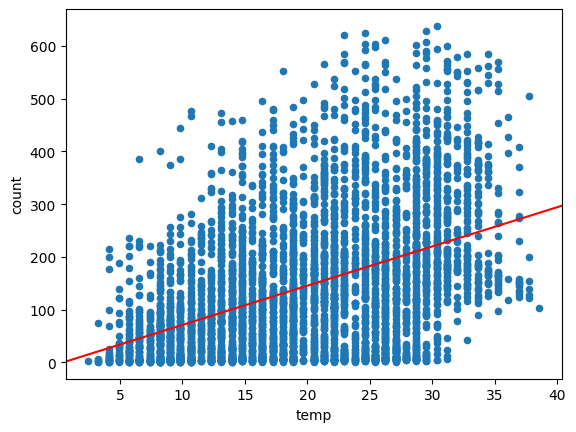

In [8]:
import matplotlib.pyplot as plt
from statsmodels.graphics.regressionplots import abline_plot

# Displaying the actual observations of temp and count
ax = data_training.plot.scatter(x='temp', y='count')
# Plotting the regression line
abline_plot(model_results=model_01, ax=ax, color='red')
plt.show()

## Fit linear regression model to training data using additional predictors

We can also combine predictors to further increase our models predictive performance.

Here we also use the __windspeed__ to predict the __count__ and save it as `model_03`.

*Run the code below.*

In [9]:
# Create and fit linear regression model with temperature as predictor
model_03 = ols(formula="count ~ temp + windspeed", data=data_training)
model_03 = model_03.fit()

## Print fitted model

To see a summary of our results and key statistics we can use the `summary()` function to print a nice and compact table.

The values we are going to focus on are:  

* __Dep. Variable__: This is the variable we want to predict in our case __count__  
* __Intercept__: This value tells us what the prediction for __count__ is without the effect of the other independent variables, here __temp__  
* __temp__: Here we can see the magnitude of the predictor variable __temp__  
* __P>|t|__: Tells us about the statistical significance of the respective variable. The smaller the value the higher the significancy of the variable.  
* __Prob (F-statistic)__: Tells us about the statistical significance of the whole model. The smaller the value the higher the significancy of the variable.
* __R-squared__: The R squared (abbreviation R2) value is a relative measure of model fit. It is always between 0 and 1 and represents how well the regression predictions approximate the real data points. Generally, the higher R2 the better our model. In this case our model can explain the total variance of number of bike rentals to an extent of 19.9%.

__DISCLAIMER:__ The adjusted R2 isn't part of the lecture and thereby simply serves as additional information and is not relevant for the exam:

* __Adj. R-squared__: The Adjusted R squared, as the name states, is an slightly adjusted version of the R2-measure. Since the R2 value will rise with every additional independent variable, it is recommendable to use its adjusted version, which includes the relation of explanatory terms in a model to the number of data points in its calculation. This penalizes the usage of useless predictors and lowers the R2 value.

*Run the code below.*

In [10]:
# Getting the model summary
print(model_01.summary(slim=True))

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.199
No. Observations:                4337   F-statistic:                     1080.
Covariance Type:            nonrobust   Prob (F-statistic):          1.25e-211
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.2220      4.831     -0.667      0.505     -12.693       6.249
temp           7.4420      0.226     32.858      0.000       6.998       7.886

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


## Try it yourself

*Adapt the code from model_01 and run a simple linear regression with the windspeed as a predictor instead of the temperature, save it as model_02, and plot the corresponding regression line.*

*Additionally print a summary of the new model.*

*Write your code below.*

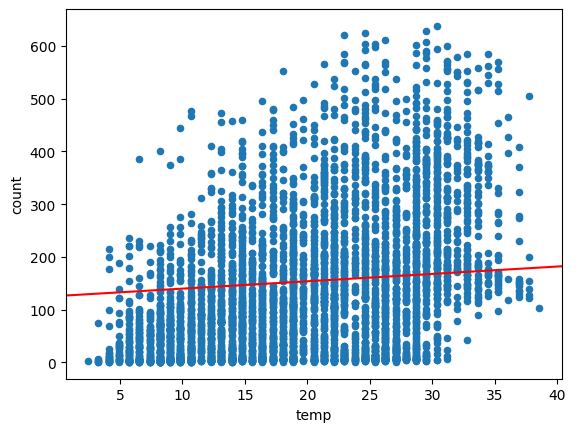

In [13]:
# Enter your code here!
model_02 = ols(formula="count ~ windspeed", data=data_training)
model_02 = model_02.fit()

# Displaying the actual observations of temp and count
ax = data_training.plot.scatter(x='temp', y='count')
# Plotting the regression line
abline_plot(model_results=model_02, ax=ax, color='red')
plt.show()

# Predictions

One way to asses the quality of our model is the R2 value as described above, which gives us a measure of the model fit. Another way to evaluate our trained models is to look at the error it makes when used for predictions. As we are in the regression setting, i.e. our dependent variable is numeric, we can calculate the difference between the true value of an instance and our prediction. This is where our left out test set comes into play. Since we didn't use it for training, it will give us an unbiased evaluation of our model's predictive performance.

## Make predictions for all entries in test set

Now let's first make predictions for all entries in the test set. We can do this by using the `predict()` function on our trained model. All we have to do is give it the data we want predictions for. Meaning now we want to take a closer look at how the `model_01`, trained on the training data `data_training`, can be used to make predictions on unseen data, i.e., the test data `data_test`.

Using the `predict()` function we make a prediction for each entity in `data_test` and safe it as `predictions`.

*Run the code below.*

In [14]:
predictions = model_01.predict(data_test)

## Attach predictions as new column to test set

We can simply add a new column by assigning the __predictions__ variable to a new column name (__predictions__) in the data frame `data_test`.

*Run the code below.*

In [15]:
data_test["predictions"] = predictions

## Calculate RMSE

Different metrics can be used to evaluate our predictions. We will use the __Root Mean Squared Error__. The RMSE measures the average magnitude of the errors between the predicted values `data_test["predictions"]` and the actual values `data_test["count"]`.

*Run the code below.*

In [16]:
from sklearn.metrics import root_mean_squared_error
rmse = root_mean_squared_error(data_test["count"], data_test["predictions"])
print(rmse)

120.57163362005154


Pretty bad...

As for now a mere simple linear regression won't do any good in achieving a low RMSE.

# Summary

So to sum it up let us have a look what we did in this week's tutorial:

1. First we tried to get an __overview of the data__ at hand  
2. After that we __transformed our data set__ in such a way, that we deleted unneeded columns and split the data into a __training and test set__  
3. Thirdly we __built different models__ in order to predict the dependent variable based on a combination of independent variables  
4. We than __evaluated__ our models by having a look at some key metrics like __model fit and significance__    
5. Finally we made __predictions on our test set__ to get an unbiased estimation of our __models predictive performance__

*You can adjust the code in the cell below to build and evaluate different models*

In [ ]:
# Enter your code here!